In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taoudenni
Processing Record 2 of Set 1 | tongren
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | san policarpo
Processing Record 13 of Set 1 | neftcala
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | santa rosa
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | fortuna
Pro

Processing Record 40 of Set 4 | ondjiva
Processing Record 41 of Set 4 | balkhash
Processing Record 42 of Set 4 | balad
Processing Record 43 of Set 4 | vredendal
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | shatalovo
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | paratinga
Processing Record 50 of Set 4 | malakal
Processing Record 1 of Set 5 | azare
Processing Record 2 of Set 5 | kyabe
Processing Record 3 of Set 5 | mitsamiouli
Processing Record 4 of Set 5 | slave lake
Processing Record 5 of Set 5 | imeni poliny osipenko
Processing Record 6 of Set 5 | bababe
City not found. Skipping...
Processing Record 7 of Set 5 | leshukonskoye
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | huarmey
Processing Record 10 of Set 5 | nordby
Processing Record 11 of Set 5 | huadian
Processing Record 12 of Set 5 | lolua
City not found. Skipping.

Processing Record 26 of Set 8 | sioux lookout
Processing Record 27 of Set 8 | aykhal
Processing Record 28 of Set 8 | tuskegee
Processing Record 29 of Set 8 | alamosa
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | aksarka
Processing Record 32 of Set 8 | omboue
Processing Record 33 of Set 8 | kaitangata
Processing Record 34 of Set 8 | lata
Processing Record 35 of Set 8 | jishu
Processing Record 36 of Set 8 | polyarnyy
Processing Record 37 of Set 8 | chapais
Processing Record 38 of Set 8 | plettenberg bay
Processing Record 39 of Set 8 | methoni
Processing Record 40 of Set 8 | harlingen
Processing Record 41 of Set 8 | kristinehamn
Processing Record 42 of Set 8 | amboasary
Processing Record 43 of Set 8 | asau
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | lavrentiya
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | shambu
Processing Record 48 of Set 8 | ahipara
Processing Record 49 of Set 8 | yulara
Proc

City not found. Skipping...
Processing Record 14 of Set 12 | hirara
Processing Record 15 of Set 12 | kieta
Processing Record 16 of Set 12 | lichinga
Processing Record 17 of Set 12 | tottori
Processing Record 18 of Set 12 | bani walid
Processing Record 19 of Set 12 | dong hoi
Processing Record 20 of Set 12 | hunza
City not found. Skipping...
Processing Record 21 of Set 12 | gimli
Processing Record 22 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | yangambi
Processing Record 25 of Set 12 | andenes
Processing Record 26 of Set 12 | kjollefjord
Processing Record 27 of Set 12 | barra da estiva
Processing Record 28 of Set 12 | ligatne
Processing Record 29 of Set 12 | murmashi
Processing Record 30 of Set 12 | upington
Processing Record 31 of Set 12 | aljezur
Processing Record 32 of Set 12 | vaitape
Processing Record 33 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 34 of Set 12 | perumpavur
P

In [10]:
len(city_data)

546

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.68,-3.98,105.39,7,0,12.59,ML,2020-08-16 23:06:45
1,Tongren,27.72,109.19,73.51,86,18,1.12,CN,2020-08-16 23:06:45
2,Hermanus,-34.42,19.23,44.01,91,100,1.01,ZA,2020-08-16 23:06:46
3,Nuuk,64.18,-51.72,53.60,46,0,6.93,GL,2020-08-16 23:06:46
4,Norman Wells,65.28,-126.83,57.20,67,75,4.70,CA,2020-08-16 23:03:56
...,...,...,...,...,...,...,...,...,...
541,Banjar,-8.19,114.97,78.80,100,75,8.05,ID,2020-08-16 23:09:08
542,Tabuleiro Do Norte,-5.25,-38.13,76.84,70,29,7.74,BR,2020-08-16 23:09:08
543,Troitskoye,52.98,84.68,56.37,94,0,6.53,RU,2020-08-16 23:09:09
544,Omsk,55.00,73.40,62.60,72,75,13.42,RU,2020-08-16 23:05:17


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2020-08-16 23:06:45,22.68,-3.98,105.39,7,0,12.59
1,Tongren,CN,2020-08-16 23:06:45,27.72,109.19,73.51,86,18,1.12
2,Hermanus,ZA,2020-08-16 23:06:46,-34.42,19.23,44.01,91,100,1.01
3,Nuuk,GL,2020-08-16 23:06:46,64.18,-51.72,53.60,46,0,6.93
4,Norman Wells,CA,2020-08-16 23:03:56,65.28,-126.83,57.20,67,75,4.70
...,...,...,...,...,...,...,...,...,...
541,Banjar,ID,2020-08-16 23:09:08,-8.19,114.97,78.80,100,75,8.05
542,Tabuleiro Do Norte,BR,2020-08-16 23:09:08,-5.25,-38.13,76.84,70,29,7.74
543,Troitskoye,RU,2020-08-16 23:09:09,52.98,84.68,56.37,94,0,6.53
544,Omsk,RU,2020-08-16 23:05:17,55.00,73.40,62.60,72,75,13.42


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time

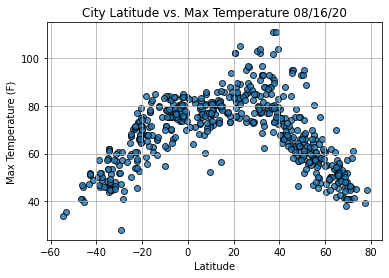

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

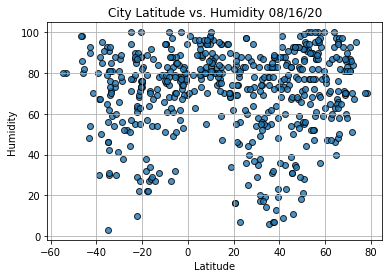

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

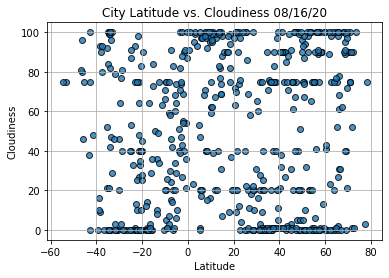

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

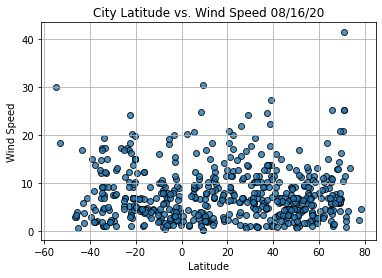

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [37]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [73]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.2f}.")

In [74]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2020-08-16 23:06:49
Lat                         55.74
Lng                        -97.86
Max Temp                     60.8
Humidity                       59
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [75]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
541    False
542    False
543     True
544     True
545    False
Name: Lat, Length: 546, dtype: bool

In [76]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2020-08-16 23:06:45,22.68,-3.98,105.39,7,0,12.59
1,Tongren,CN,2020-08-16 23:06:45,27.72,109.19,73.51,86,18,1.12
3,Nuuk,GL,2020-08-16 23:06:46,64.18,-51.72,53.60,46,0,6.93
4,Norman Wells,CA,2020-08-16 23:03:56,65.28,-126.83,57.20,67,75,4.70
6,Chokurdakh,RU,2020-08-16 23:06:47,70.63,147.92,40.71,93,100,10.51


In [77]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

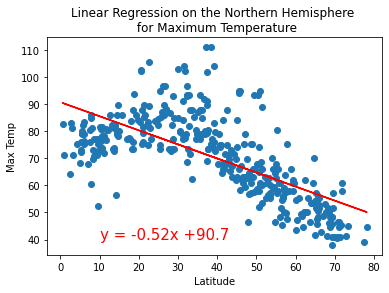

The r-value is -0.68.


In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

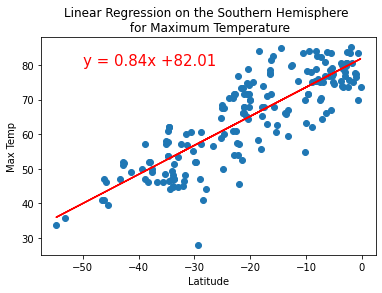

The r-value is 0.84.


In [79]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,80))

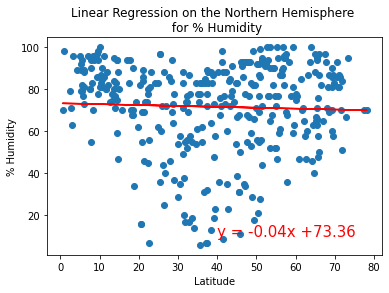

The r-value is -0.04.


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

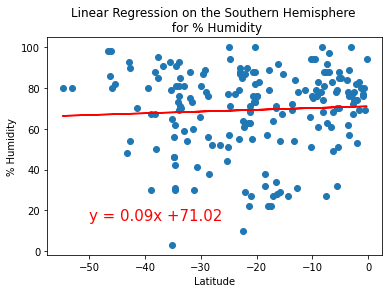

The r-value is 0.06.


In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,15))

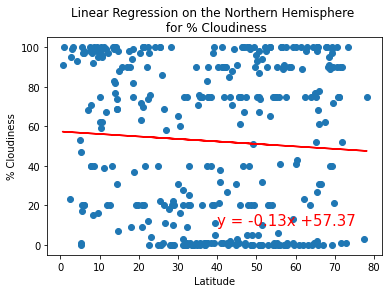

The r-value is -0.06.


In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

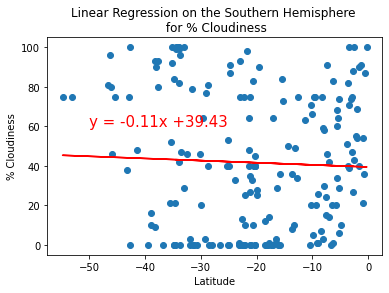

The r-value is -0.04.


In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

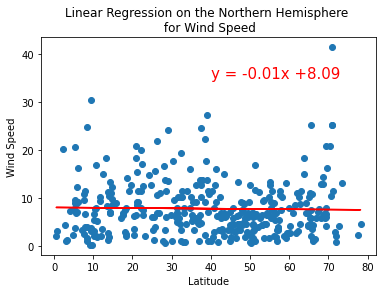

The r-value is -0.02.


In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

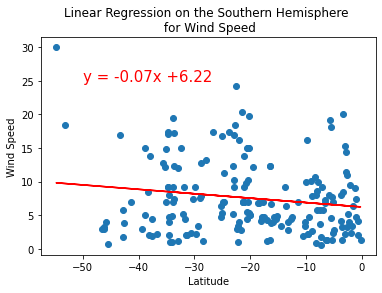

The r-value is -0.16.


In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))